# Progetto del corso

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
!ls

AB_NYC_2019.csv                    environment.yaml
Airbnb_Analysis.ipynb              new-york-city-airbnb-open-data.zip
Course Project.ipynb               requirements.txt
Develop.yml                        wordcloud.png
New_York_City_.png


In [3]:
BASEPATH = os.path.abspath("")
print(BASEPATH)
DATA = 'AB_NYC_2019.csv'
PATH = os.path.join(BASEPATH, DATA)
print(PATH)

/Users/jeydi/Dropbox/Corsi/CorsoInsubria-DataScienceBusiness/Notebooks/project_example/NewYorkAirbnb
/Users/jeydi/Dropbox/Corsi/CorsoInsubria-DataScienceBusiness/Notebooks/project_example/NewYorkAirbnb/AB_NYC_2019.csv


In [4]:
x = [1,2,3,4,5,6] #lista
y = {"chiave":42, "lista":[4,5,6,7]} #dizionario
print(type(y))
print(y)
x

<class 'dict'>
{'chiave': 42, 'lista': [4, 5, 6, 7]}


[1, 2, 3, 4, 5, 6]

In [5]:
dataset = pd.read_csv(PATH,parse_dates=["last_review"])
print(f"Dataset shape: {dataset.shape}")
dataset.head(10)


Dataset shape: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [6]:
print(f"Dataframe lenght: {len(dataset)}")
print(f"\nDataframe Columns: {len(dataset.columns)}")
print(f"\nDataframe Types: \n{dataset.dtypes}")

columns = dataset.columns
print(columns)

Dataframe lenght: 48895

Dataframe Columns: 16

Dataframe Types: 
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price

In [7]:
dataset.describe

<bound method NDFrame.describe of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

     

Cerco i nulli

In [8]:
print(dataset.shape)
dataset.isnull().sum()

(48895, 16)


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
dataset.fillna({"reviews_per_month":0}, inplace=True)
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
dataset['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## Grafici

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

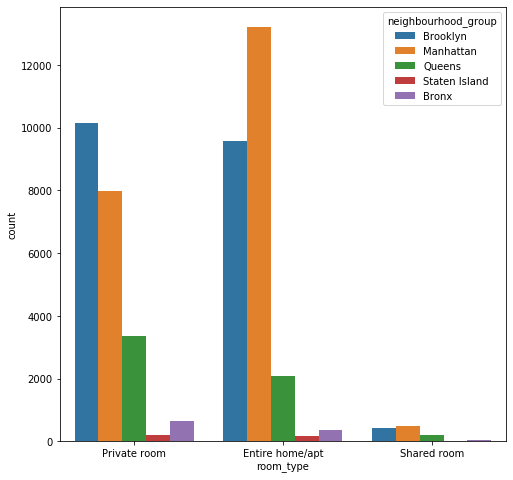

In [12]:
#definiamo la figura (il grafico) che vogliamo stampare
plt.figure(figsize=(8,8))
#ax = sns.countplot(dataset["neighbourhood_group"],palette="muted")
ax = sns.countplot(dataset['room_type'],hue=dataset['neighbourhood_group'])

In [13]:
dataset.groupby("room_type")['number_of_reviews'].mean()

room_type
Entire home/apt    22.842418
Private room       24.112962
Shared room        16.600000
Name: number_of_reviews, dtype: float64

## Cancelliamo colonne che non ci servono

In [14]:

df_ml = dataset.copy()
lista_colonne = ['host_name','name','host_id','id']
df_ml.drop(lista_colonne, axis=1, inplace=True)


## Trattiamo i missing values

In [15]:
#Verifico se ci sono ancora dei missing
print(df_ml.shape)
df_ml.isnull().sum()

(48895, 12)


neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [16]:
df_ml['last_review'] = df_ml['last_review'].fillna(0)

In [17]:
print("Duplicati iniziali: ", df_ml.duplicated().sum())
df_ml.drop_duplicates(inplace=True)
print("Duplicati risultanti: ", df_ml.duplicated().sum())

Duplicati iniziali:  0
Duplicati risultanti:  0


In [18]:
df_ml['price']

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

Text(0.5, 0, 'log(1+price)')

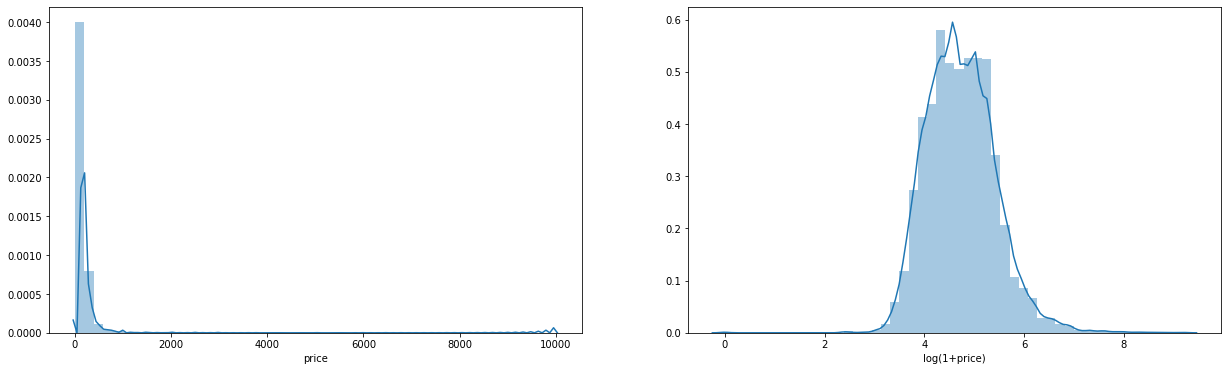

In [19]:
fig, axes = plt.subplots(1,2, figsize=(21,6))

sns.distplot(df_ml['price'], ax=axes[0])
sns.distplot(np.log1p(df_ml['price']), ax=axes[1])

axes[1].set_xlabel('log(1+price)')

In [20]:
df_ml['price'] = np.log1p(df_ml['price'])

### Identifichiamo le colonne categoriche

In [21]:
##Last_review drop (per facilitare l'esempio)
df_ml = df_ml.drop(['last_review'],axis=1)

In [22]:
categoriche = df_ml.select_dtypes(include=['object'])
print(f"Categoriche: {categoriche.shape}")
categoriche.columns

Categoriche: (48895, 3)


Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

In [23]:
type(categoriche)

pandas.core.frame.DataFrame

In [24]:
categoriche_trasformate = pd.get_dummies(categoriche)

In [25]:
categoriche_trasformate.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Trasformiamo le colonne numeriche

In [26]:
df_temp = df_ml.copy()
df_temp = df_temp.select_dtypes(exclude=['object'])
print(df_temp.shape)
df_temp.columns

(48895, 8)


Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [27]:
y = df_temp.price
df_temp = df_temp.drop(['price'], axis = 1)

In [28]:
y.head()

0    5.010635
1    5.420535
2    5.017280
3    4.499810
4    4.394449
Name: price, dtype: float64

In [29]:
#assembliamo con numpy
X = np.concatenate((df_temp, categoriche_trasformate),axis=1)
#assembliamo con pandas
X_df = pd.concat([df_temp, categoriche_trasformate], axis = 1)

print(f"Numpy type: {type(X)}")
print(f"Dataframe type: {type(X_df)}")

print(X)
print()
print(X_df)

Numpy type: <class 'numpy.ndarray'>
Dataframe type: <class 'pandas.core.frame.DataFrame'>
[[ 40.64749 -73.97237   1.      ...   0.        1.        0.     ]
 [ 40.75362 -73.98377   1.      ...   1.        0.        0.     ]
 [ 40.80902 -73.9419    3.      ...   0.        1.        0.     ]
 ...
 [ 40.81475 -73.94867  10.      ...   1.        0.        0.     ]
 [ 40.75751 -73.99112   1.      ...   0.        0.        1.     ]
 [ 40.76404 -73.98933   7.      ...   0.        1.        0.     ]]

       latitude  longitude  minimum_nights  number_of_reviews  \
0      40.64749  -73.97237               1                  9   
1      40.75362  -73.98377               1                 45   
2      40.80902  -73.94190               3                  0   
3      40.68514  -73.95976               1                270   
4      40.79851  -73.94399              10                  9   
...         ...        ...             ...                ...   
48890  40.67853  -73.94995               2    

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [33]:
#random forest model
from sklearn.ensemble import RandomForestRegressor

In [34]:
model = RandomForestRegressor(random_state=42)
result = model.fit(X_train,y_train)


In [35]:
result

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [36]:
prediction = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(prediction, y_test))
print(r2_score(prediction, y_test))

0.19000225164295073
0.38557391195592294


In [39]:
import eli5
eli5.show_weights(model, feature_names=list(X_df.columns))

Weight,Feature
0.3732 ± 0.0093,room_type_Entire home/apt
0.1421 ± 0.0192,longitude
0.1362 ± 0.0137,latitude
0.0744 ± 0.0060,availability_365
0.0521 ± 0.0055,reviews_per_month
0.0513 ± 0.0061,minimum_nights
0.0409 ± 0.0048,number_of_reviews
0.0318 ± 0.0147,neighbourhood_group_Manhattan
0.0318 ± 0.0047,calculated_host_listings_count
0.0060 ± 0.0017,neighbourhood_Midtown


In [44]:
#salvataggio del modello con pickle
from pickle import dump,load
import os
# save the model
model_path = os.path.join(os.path.abspath(""),"modello.pkl")
dump(model, open(model_path, 'wb'))

In [45]:
!ls

AB_NYC_2019.csv                    environment.yaml
Airbnb_Analysis.ipynb              modello.pkl
Course Project.ipynb               new-york-city-airbnb-open-data.zip
Develop.yml                        requirements.txt
New_York_City_.png                 wordcloud.png


In [46]:
# load the model
model = load(open(model_path, 'rb'))

In [47]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [48]:
#dati nuovi arrivano dall'utente